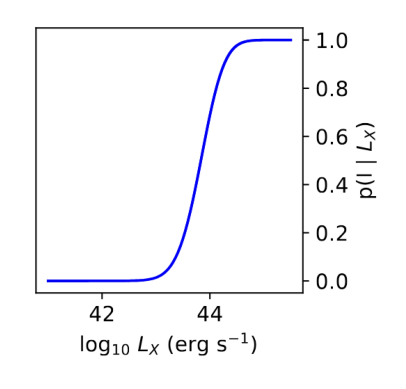

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = "data/erosita-sel-func.png"
img = Image.open(img_path)

# Display the uploaded plot
plt.imshow(img)
plt.axis("off")
plt.show()

In [7]:
%pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 43.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 45.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


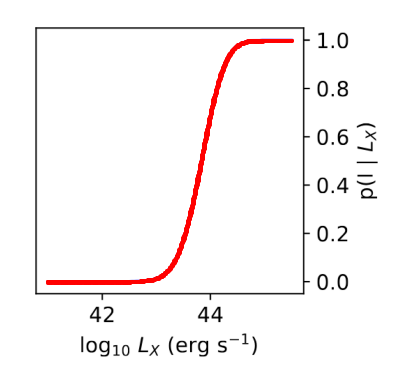

[(np.float64(41.0), np.float64(0.008595988538681931)),
 (np.float64(41.712250712250714), np.float64(0.008595988538681931)),
 (np.float64(42.42450142450142), np.float64(0.0)),
 (np.float64(43.193732193732195), np.float64(0.017191977077363862)),
 (np.float64(43.69230769230769), np.float64(0.1404011461318052)),
 (np.float64(43.90598290598291), np.float64(0.26074498567335247)),
 (np.float64(44.06267806267806), np.float64(0.4240687679083095)),
 (np.float64(44.205128205128204), np.float64(0.5358166189111748)),
 (np.float64(44.34757834757835), np.float64(0.6876790830945558)),
 (np.float64(44.53276353276353), np.float64(0.8481375358166189))]

In [ ]:
import cv2

# Convert image to array for processing
img_array = np.array(img)

# Convert to grayscale
gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)

# Detect blue line by masking (since the line is blue)
hsv = cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Get coordinates of blue pixels
ys, xs = np.where(mask > 0)

# Normalize coordinates to [0,1] in image space
x_norm = (xs - xs.min()) / (xs.max() - xs.min())
y_norm = 1 - (ys - ys.min()) / (ys.max() - ys.min())  # flip y-axis

# Scale to axis values (x ~ 41–45, y ~ 0–1)
x_data = 41 + x_norm * (45 - 41)
y_data = y_norm

# Sort by x for clarity
sorted_idx = np.argsort(x_data)
x_data_sorted = x_data[sorted_idx]
y_data_sorted = y_data[sorted_idx]

# Show extracted curve overlay
plt.figure(figsize=(5,5))
plt.imshow(img_array)
plt.scatter(xs, ys, s=1, c="red")
plt.axis("off")
plt.show()

# Return a sample of extracted data points
list(zip(x_data_sorted[::200], y_data_sorted[::200]))[:10]


In [9]:
import pandas as pd

# Create dataframe with sorted data
df = pd.DataFrame({
    "log10_Lx_erg_s^-1": x_data_sorted,
    "p_I_given_Lx": y_data_sorted
})

# Save to CSV
csv_path = "data/extracted_curve.csv"
df.to_csv(csv_path, index=False)

csv_path

'data/extracted_curve.csv'